In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [25]:
df.shape

(1338, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Converting Categorical Values to Numeric values**

In [29]:
# Converting sex from categorical to numeric
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [30]:
df[['male','female']]=pd.get_dummies(df['sex'])

In [31]:
df=df.drop(['female'],axis=1)

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [35]:
# Converting Smoker to numeric
pd.get_dummies(df['smoker'])

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [38]:
df[['Smoking_No','Smoking_Yes']]=pd.get_dummies(df['smoker'])

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoking_No,Smoking_Yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0


In [41]:
df=df.drop(['Smoking_No'],axis=1)

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoking_Yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [43]:
# Converting region to numeric
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [45]:
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [46]:
df[['northeast','northwest','southeast','southwest']]=pd.get_dummies(df['region'])

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoking_Yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,1,0,0


# **Exploratory Data Analysis (EDA)**

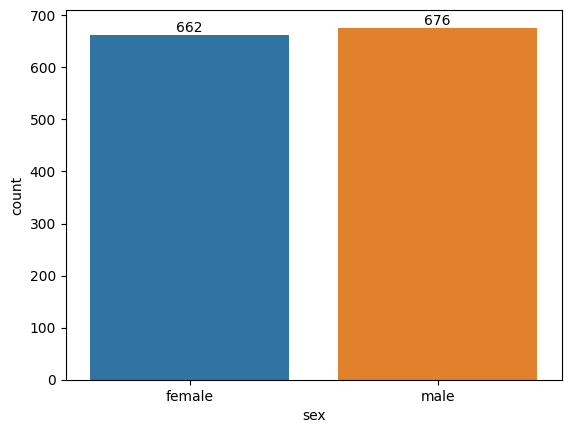

In [49]:
ax=sns.countplot(x='sex',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

Total Number of Females and males in the dataset are **662** and **676** respectvely

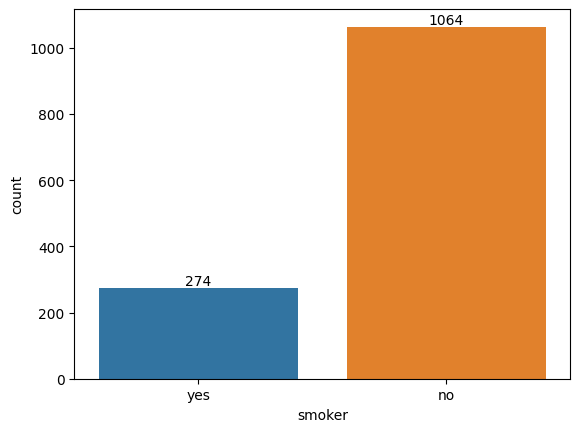

In [51]:
ax=sns.countplot(x='smoker',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

Total smokers in dataset are **274**

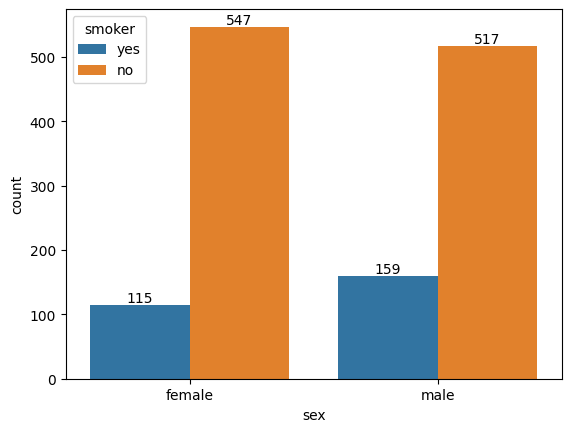

In [53]:
ax=sns.countplot(x='sex',data=df,hue='smoker')

for bar in ax.containers:
  ax.bar_label(bar)

From here we can say that thare are **more male smokers**.

<Axes: xlabel='sex', ylabel='charges'>

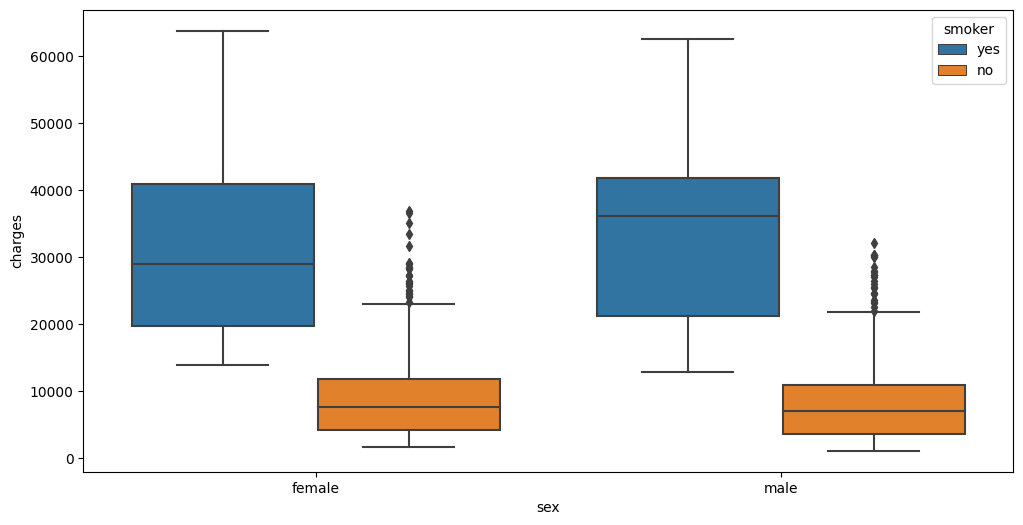

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex',y='charges',data=df,hue='smoker')

From here we can say that **smokers pay more** as compared to non smokers

<Axes: xlabel='age', ylabel='charges'>

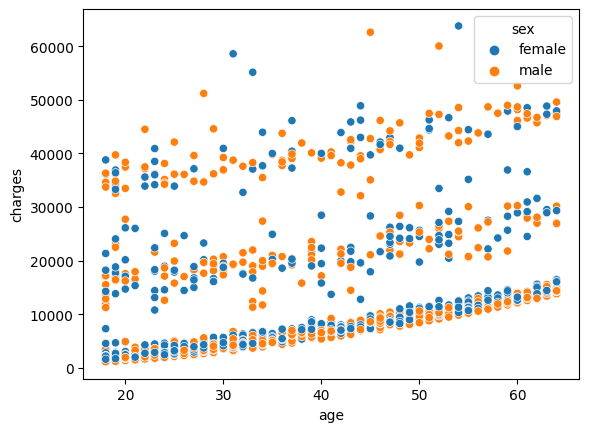

In [66]:
sns.scatterplot(x='age',y='charges',data=df,hue='sex')

As **age increases** the insurance **cost increases**

<Axes: xlabel='age', ylabel='charges'>

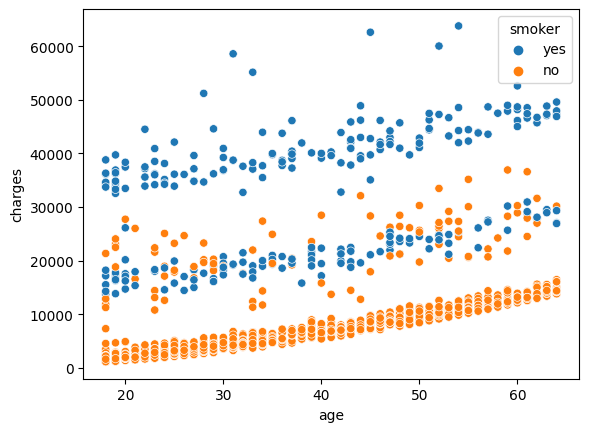

In [67]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')

The insurance cost of smokers in **2-3x** of non-smokers  

<Axes: xlabel='age', ylabel='charges'>

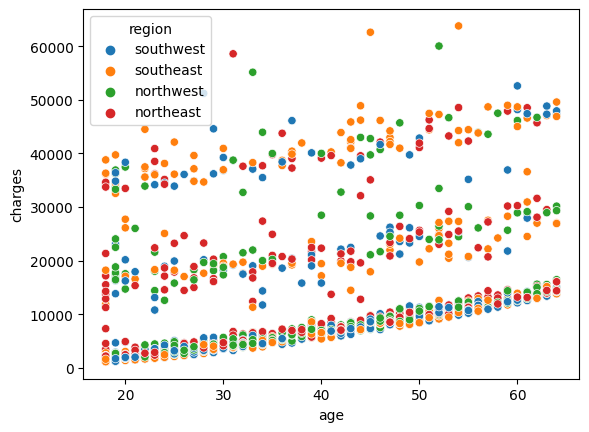

In [68]:
sns.scatterplot(x='age',y='charges',data=df,hue='region')

<Axes: xlabel='bmi', ylabel='charges'>

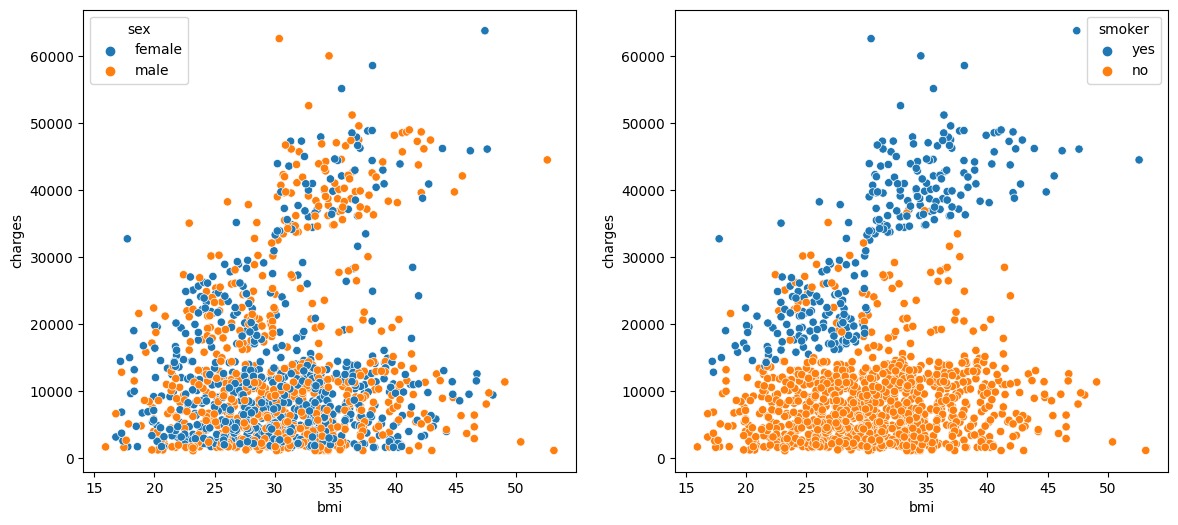

In [73]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'smoker', ax = ax[1])

Non smokers with high bmi have less charges as compared to smkokers with a good bmi  

In [76]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [77]:
df.corr()

,age,bmi,children,charges,male,Smoking_Yes,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
male,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185,0.002425,0.011156,-0.017117,0.004184
Smoking_Yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

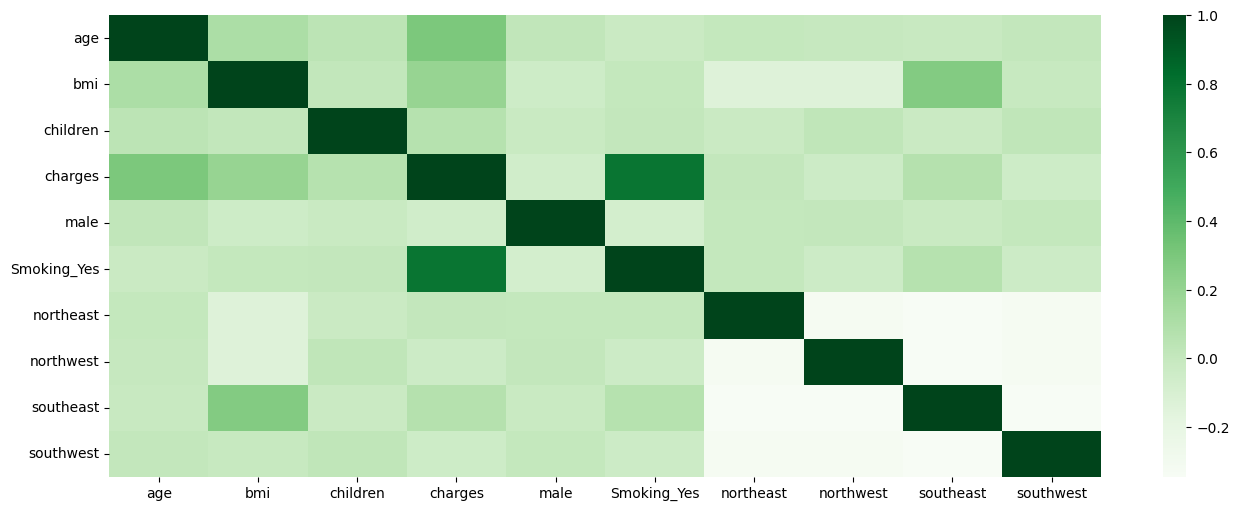

In [84]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), cmap='Greens')

# **Predictive Analysis**

In [85]:
X=df.drop('charges', axis=1)
y=df['charges']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# **Random Forest Regressor**

In [95]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=3000)
rfr.fit(scaled_x_train, y_train)
predict = rfr.predict(scaled_x_test)

In [100]:
predict

array([ 7352.87378151, 16974.34022084, 13908.64955213, 11525.79699131,
       44396.78837414, 12047.63741563,  6330.3099149 ,  7556.1025969 ,
        1611.2107695 , 10975.08346978, 17997.51030578,  2380.6863464 ,
        3883.12069181, 42165.10283626, 10671.44139504, 15046.46300266,
        7768.96239485, 14274.89812693, 13846.34669953, 35034.35044695,
       19204.55349838,  8734.62567227, 11787.83242057, 18124.92046021,
        4111.99430221,  4567.28240875,  6560.16090945,  6674.19411386,
       39318.11339256, 13726.14422776,  7190.06764204, 18077.14929478,
       41405.86452125, 11728.37721051, 10591.17559207,  5233.04657465,
       38591.20139543,  8838.27265498, 41415.78989022,  9000.7466064 ,
       10405.2776843 ,  9134.11203716, 13511.80639353, 16504.87962046,
        3699.8245385 ,  8475.415995  , 12581.4191041 ,  3021.86971173,
        7506.7642241 , 21786.01606862, 23551.69396489,  3423.39956762,
        8355.76730527, 16025.91690027,  6981.84175746,  7804.58962201,
      

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predict)

2583.026690543958

In [102]:
np.sqrt(mean_squared_error(y_test, predict))

4791.347509910829

In [135]:
X_train.head()

,age,bmi,children,male,Smoking_Yes,northeast,northwest,southeast,southwest
786,60,36.955,0,0,0,1,0,0,0
1061,57,27.940,1,0,0,0,0,1,0
103,61,29.920,3,1,1,0,0,1,0
395,46,19.855,0,0,0,0,1,0,0
492,18,25.080,0,1,0,1,0,0,0


In [142]:
features = np.array([[21,31.8,0,1,0,1,0,0,0]])
my_cost = rfr.predict(features)
my_cost

array([17331.77295557])

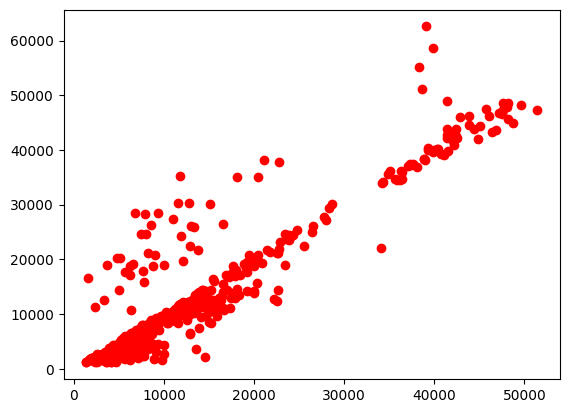

In [150]:
plt.scatter(predict,y_test,color='red')

# **Support Vector Regressor**

In [127]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)
predict3 = regressor.predict(scaled_x_test)

In [128]:
mean_absolute_error(y_test, predict3)

8769.654908331906

In [129]:
np.sqrt(mean_squared_error(y_test, predict3))

13340.399967884958

In [144]:
features = np.array([[21,31.8,0,1,0,1,0,0,0]])
my_cost = regressor.predict(features)
my_cost

array([9441.20926441])

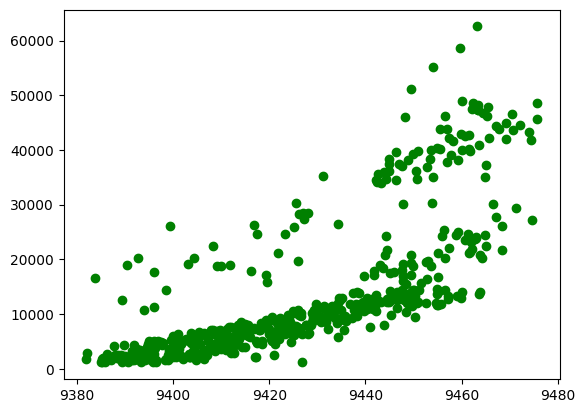

In [151]:
plt.scatter(predict3,y_test,color='green')


# **Multiple Linear Regression**

In [130]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_x_train, y_train)
predict2 = lr.predict(scaled_x_test)

In [131]:
mean_absolute_error(y_test, predict2)

4254.1016327217685

In [132]:
np.sqrt(mean_squared_error(y_test, predict2))

6143.259561392057

In [145]:
features = np.array([[21,31.8,0,1,0,1,0,0,0]])
my_cost = lr.predict(features)
my_cost

array([152701.54013892])

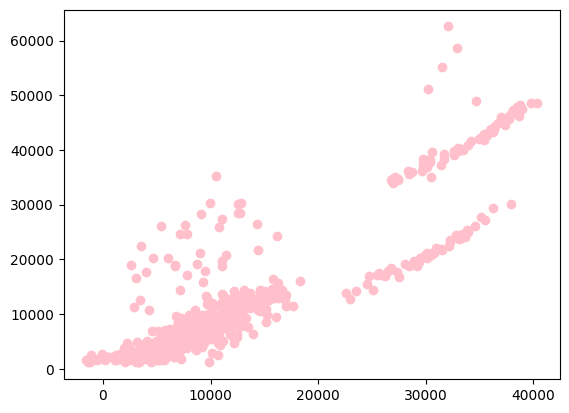

In [152]:
plt.scatter(predict2,y_test,color='pink')

The best results achieved from the data set were from **Random Forest Regressor**